In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install easyocr

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os
import json
import glob
import random
from PIL import Image, ImageFont, ImageDraw

In [ ]:
%pwd

'/content'

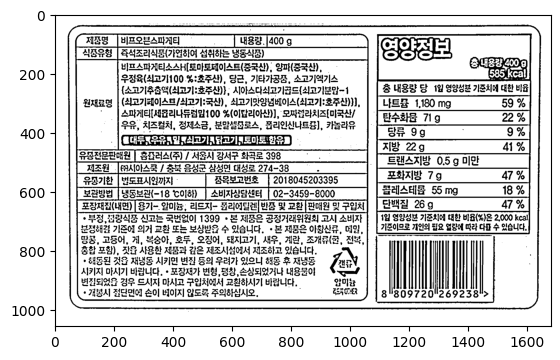

In [ ]:
def image_preprocessing(img):

    img = cv2.imread(img)
    # print('이미지 사이즈 :', img.shape)
    # resized = imutils.resize(img, width=255)
    # clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    # img = clahe.apply(img)
    img_resize = cv2.resize(img, dsize= None, fx = 2, fy = 2)

    # img_resize = cv2.bilateralFilter(img_resize, -10, 10, 5)
    img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    # th, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,13)
    # print('threshold값 :', th)

    # 커널 생성(대상이 있는 픽셀을 강조)
    # kernel = np.array([[0, -1, 0],
    #                    [-1, 5,-1],
    #                    [0, -1, 0]])

    # # 커널 적용
    # kernel = cv2.filter2D(img_bin, -1, kernel)

    # plt.figure(figsize = (30,40))
    # images = [th2, img_kernel_1, img_kernel_2, img_kernel_3]
    # for i in range(4):
    #     plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    #     # plt.title(titles[i])
    #     plt.xticks([]),plt.yticks([])
    # plt.tight_layout()
    # plt.show()
    plt.imshow(th3, cmap = 'gray')
    # print('최종 이미지 사이즈 :', image_sharp.shape)
    return th3

image_pre = image_preprocessing('/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/146006808.jpg')

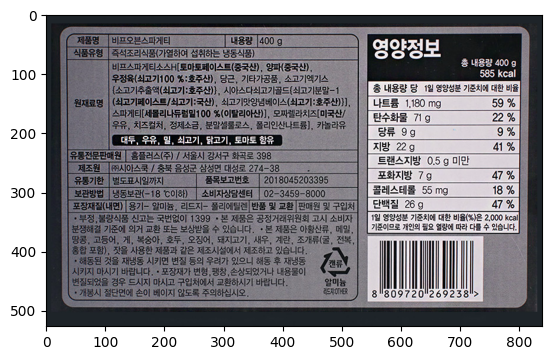

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/146006808.jpg')
plt.imshow(img)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

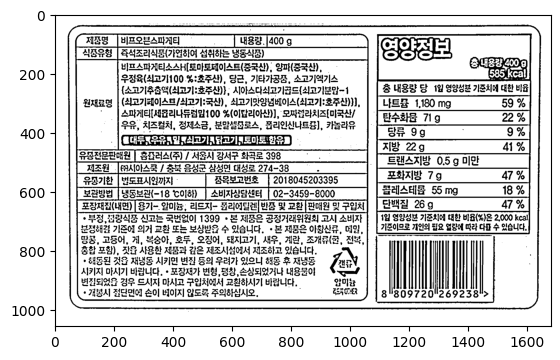

In [ ]:
# cv2.imshow('image_sharp', image_sharp)
# cv2.imshow('img_gray', img_gray)
# cv2.waitKey()
# cv2.destroyAllWindows()

img_path = '/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/146006808.jpg'
image_pre = image_preprocessing(img_path)


reader = easyocr.Reader(['ko', 'en'], model_storage_directory='korean_g2.pth')
result = reader.readtext(image_pre)

In [ ]:
text_result = [res[1] for res in result]
print(  text_result )

['제중명', '비프오분스파티', '대용량.', '400 9', '식표유형', '죽식조리식품가연히여 섭취하는 냉동식표)', '영g정보', '비프스파재티소스H토마토데이스트중국산) ; 양파중국산)', '37용장409', '우정육(쇠고기100 %:초주산) , 당근 , 기타가공품 , 소고기액기스', 'BSSKcal', '{소고기주하액(쇠고기:호주산)} ; 시아스다쇠고기국드쇠고기분화-1', '내용량 당', '1임 영양성분 기준치어 대한 비율', '원재료명', '(쇠고기테이스무/쇠고기:국신) , 쇠고기맛양넘베이스(쇠고기:호주산))] ,', '나트움 1180 mg', '59 %', '쓰파게타세문리나두렇임100 영(이1리야신)] , 모찌럽라치진미국신/', '탄수화움', '22 %', '우유, 치즈걸처, 정제소금 , 분말실표로스 , 푹리인산나토중] , 카놀라유', '당류 9 g', '9%', '때듬고요유고외R쇠고기R다고기R토미토입유D', '지방', '41 %', '유전원매원', '컴러스주)', '서욱시 강서구 }범로 398', '트랜스지방 05 g 미만', '제조원', '(시야스로 / 충북 응성군 상성면 대성로 274-38', '유공기한', '변도표시임까지', '품목보고번호', '2018045203395', '포화지방 7 g', '47 %', '보관방법', '냉동보관-18 C이해)', '소비자상담센터', '02-3459-8000', '올레스데롭 55 m', '18 %', '포장재집대편기용기- 알미늄; 리드지- 풀리어델리 반롭 및 교함|판매원 및 구입처', '단백질', '26 9', '47 %', '부정 운량식품 신고는 국번없이 1399', '본 제문은 공정거래위원회 고시소비자', '1입 영양성본 기준치에 대안 비회-온 2000 kcal', '분쟁해경 기준어 의거 교환 또는 보상받율 수 있습니다 .', '본 제품은 아탕산류 , 메잎', '기준이므로 기인의 편요 원령어 따라 다툼 수 있습니다 _', '땅콩 , 고동어', '제 , 복승아, 호두 , 오징어, 돼지고기, 새우, 계란 

In [ ]:
text_result

['제중명',
 '비프오분스파티',
 '대용량.',
 '400 9',
 '식표유형',
 '죽식조리식품가연히여 섭취하는 냉동식표)',
 '영g정보',
 '비프스파재티소스H토마토데이스트중국산) ; 양파중국산)',
 '37용장409',
 '우정육(쇠고기100 %:초주산) , 당근 , 기타가공품 , 소고기액기스',
 'BSSKcal',
 '{소고기주하액(쇠고기:호주산)} ; 시아스다쇠고기국드쇠고기분화-1',
 '내용량 당',
 '1임 영양성분 기준치어 대한 비율',
 '원재료명',
 '(쇠고기테이스무/쇠고기:국신) , 쇠고기맛양넘베이스(쇠고기:호주산))] ,',
 '나트움 1180 mg',
 '59 %',
 '쓰파게타세문리나두렇임100 영(이1리야신)] , 모찌럽라치진미국신/',
 '탄수화움',
 '22 %',
 '우유, 치즈걸처, 정제소금 , 분말실표로스 , 푹리인산나토중] , 카놀라유',
 '당류 9 g',
 '9%',
 '때듬고요유고외R쇠고기R다고기R토미토입유D',
 '지방',
 '41 %',
 '유전원매원',
 '컴러스주)',
 '서욱시 강서구 }범로 398',
 '트랜스지방 05 g 미만',
 '제조원',
 '(시야스로 / 충북 응성군 상성면 대성로 274-38',
 '유공기한',
 '변도표시임까지',
 '품목보고번호',
 '2018045203395',
 '포화지방 7 g',
 '47 %',
 '보관방법',
 '냉동보관-18 C이해)',
 '소비자상담센터',
 '02-3459-8000',
 '올레스데롭 55 m',
 '18 %',
 '포장재집대편기용기- 알미늄; 리드지- 풀리어델리 반롭 및 교함|판매원 및 구입처',
 '단백질',
 '26 9',
 '47 %',
 '부정 운량식품 신고는 국번없이 1399',
 '본 제문은 공정거래위원회 고시소비자',
 '1입 영양성본 기준치에 대안 비회-온 2000 kcal',
 '분쟁해경 기준어 의거 교환 또는 보상받율 수 있습니다 .',
 '본 제품은 아탕산류 , 메잎',
 '기준이므로 기인의 편요 원령어 따라 다툼 수 

['제중명',
 '비프오분스파티',
 '대용량.',
 '400 9',
 '식표유형',
 '죽식조리식품가연히여 섭취하는 냉동식표)',
 '영g정보',
 '비프스파재티소스H토마토데이스트중국산) ; 양파중국산)',
 '37용장409',
 '우정육(쇠고기100 %:초주산) , 당근 , 기타가공품 , 소고기액기스',
 'BSSKcal',
 '{소고기주하액(쇠고기:호주산)} ; 시아스다쇠고기국드쇠고기분화-1',
 '내용량 당',
 '1임 영양성분 기준치어 대한 비율',
 '원재료명',
 '(쇠고기테이스무/쇠고기:국신) , 쇠고기맛양넘베이스(쇠고기:호주산))] ,',
 '나트움 1180 mg',
 '59 %',
 '쓰파게타세문리나두렇임100 영(이1리야신)] , 모찌럽라치진미국신/',
 '탄수화움',
 '22 %',
 '우유, 치즈걸처, 정제소금 , 분말실표로스 , 푹리인산나토중] , 카놀라유',
 '당류 9 g',
 '9%',
 '때듬고요유고외R쇠고기R다고기R토미토입유D',
 '지방',
 '41 %',
 '유전원매원',
 '컴러스주)',
 '서욱시 강서구 }범로 398',
 '트랜스지방 05 g 미만',
 '제조원',
 '(시야스로 / 충북 응성군 상성면 대성로 274-38',
 '유공기한',
 '변도표시임까지',
 '품목보고번호',
 '2018045203395',
 '포화지방 7 g',
 '47 %',
 '보관방법',
 '냉동보관-18 C이해)',
 '소비자상담센터',
 '02-3459-8000',
 '올레스데롭 55 m',
 '18 %',
 '포장재집대편기용기- 알미늄; 리드지- 풀리어델리 반롭 및 교함|판매원 및 구입처',
 '단백질',
 '26 9',
 '47 %',
 '부정 운량식품 신고는 국번없이 1399',
 '본 제문은 공정거래위원회 고시소비자',
 '1입 영양성본 기준치에 대안 비회-온 2000 kcal',
 '분쟁해경 기준어 의거 교환 또는 보상받율 수 있습니다 .',
 '본 제품은 아탕산류 , 메잎',
 '기준이므로 기인의 편요 원령어 따라 다툼 수 

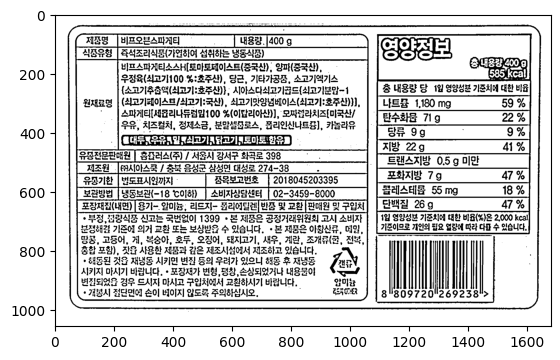

In [ ]:
def image_preprocessing(img):

    img = cv2.imread(img)

    img_resize = cv2.resize(img, dsize= None, fx = 2, fy = 2)

    img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,13)

    plt.imshow(th3, cmap = 'gray')
    return th3

image_pre = image_preprocessing('/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/146006808.jpg')

img_path = '/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/146006808.jpg'
image_pre = image_preprocessing(img_path)


reader = easyocr.Reader(['ko', 'en'], model_storage_directory='korean_g2.pth')
result = reader.readtext(image_pre)

text_result = [res[1] for res in result]
text_result

['육생',
 '짜장C볶이',
 '_품- 콩요 정-하이"',
 '"문어h 싶출#@p워@',
 '533 ]',
 '[-m하-불회원하로',
 '신 청치소럽 국',
 '유지가끔',
 '알정히스나 카_등가지하오백@',
 '19떠]',
 '비트밤',
 '가미느 ',
 '정계소금',
 '내간 다두위대두)',
 '진지 D-자망로오스',
 '물인찬니트',
 '전올하리 기이 무',
 '그모{',
 '사O무',
 '16들1',
 "'미국산",
 '효중증미릭_끄주선 국주 n미로',
 '{민 미국산;',
 '7어주 건 %-',
 '_iR @무기말',
 '팀신다',
 '소: "',
 '7  마구',
 '문말 요소처리스터비마 진크검',
 '39263138',
 '#부터-',
 '휴다',
 '대뉴 인 쇠고기',
 '[마칙력로 기록플고적로기#물3?019',
 '아 인 주',
 "'덥고리어 경기도 희망주",
 '외부문 수러로 682 1',
 "' 보@:",
 '남장쪽',
 "'외무움 순문a로 173번긴 18-3 '모장지질 조리어브옛다)",
 'I8',
 '냉동보',
 '독기만 반도표기',
 "'반품 및 그만 제조권",
 '편대터  소비지상',
 '070-8591-0910',
 "'디민망경",
 "'고훈어거제후 크중이 도마보이야",
 '@대',
 '모두 모림어 조개료진',
 '흉비프E 짓은 사르다',
 '근은 저조사g머서',
 '36 7',
 '엿습쉬다 정기질',
 "[밖출템 '#t",
 "'또존호장",
 "'장다저기 바답내다",
 "'저품e",
 "'부질 { 침식품 신고는 국_없어 1399",
 "'영양청보",
 '나용합 6)B 1허기공활 J10 당 G가무',
 '나드둑',
 '다수하다',
 '트스시방 포빠지밥 그스템트 단백진',
 '12gg',
 "'10933",
 '2355',
 '1398',
 "1마무 카비 기록어베미사 바버  기Tn 대기로이다3 -리미리다  _ 다 다리 대일 수 매l대'",
 '조리밥법',
 '4p0m] 년고 신n 심대어서 먹}미스무다 넘마주세요',
 '국모미 몹기 

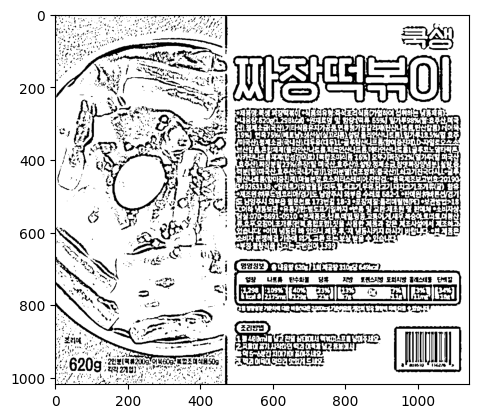

In [ ]:
def image_preprocessing(img):

    img = cv2.imread(img)

    img_resize = cv2.resize(img, dsize= None, fx = 2, fy = 2)

    img_gray = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
    th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,13)

    plt.imshow(th3, cmap = 'gray')
    return th3

image_pre = image_preprocessing('/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/19_1657850735.jpg')

img_path = '/content/drive/MyDrive/ASAC/혜준/영양성분표/냉동식품/19_1657850735.jpg'
image_pre = image_preprocessing(img_path)


reader = easyocr.Reader(['ko', 'en'], model_storage_directory='korean_g2.pth')
result = reader.readtext(img_path)

text_result = [res[1] for res in result]
text_result

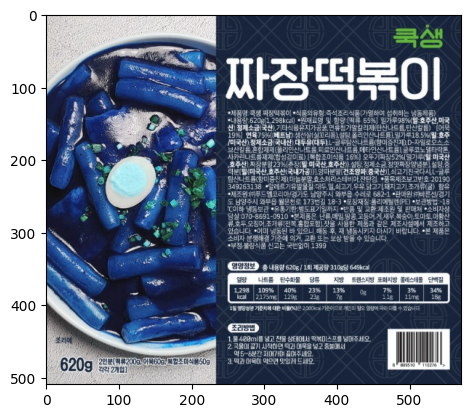

In [ ]:
img = cv2.imread(img_path)
plt.imshow(img)